In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.impute import SimpleImputer

In [33]:
df = pd.read_csv('data/madfhantr.csv')

In [34]:
print(df.isnull().sum())

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [35]:
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df.dropna(subset=['Loan_Status'], inplace=True)

In [53]:
df['Dependents'] = df['Dependents'].replace('3+', 3)
# Handle missing values in 'Dependents' column
df['Dependents'] = df['Dependents'].fillna(0)  # Replace NaN with 0 or another reasonable value
# Convert 'Dependents' column to integer
df['Dependents'] = df['Dependents'].astype(int)

In [54]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(), inplace=True)
df.dropna(subset=['Loan_Amount_Term'], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].median(), inplace=True)
df.dropna(subset=['Credit_History'], inplace=True)

In [55]:
for column in ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']:
    df[column] = LabelEncoder().fit_transform(df[column])

In [56]:
X = df[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome',
        'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']]
y = df['Loan_Status']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [59]:
dt_classifier = DecisionTreeClassifier(random_state=42)


In [60]:
dt_classifier.fit(X_train_scaled, y_train)


DecisionTreeClassifier(random_state=42)

In [61]:
y_pred = dt_classifier.predict(X_test_scaled)

In [62]:
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy Score of the Decision Tree Classifier:", accuracy)

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 


Accuracy Score of the Decision Tree Classifier: 0.6829268292682927

Confusion Matrix:
[[23 20]
 [19 61]]

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.53      0.54        43
           1       0.75      0.76      0.76        80

    accuracy                           0.68       123
   macro avg       0.65      0.65      0.65       123
weighted avg       0.68      0.68      0.68       123



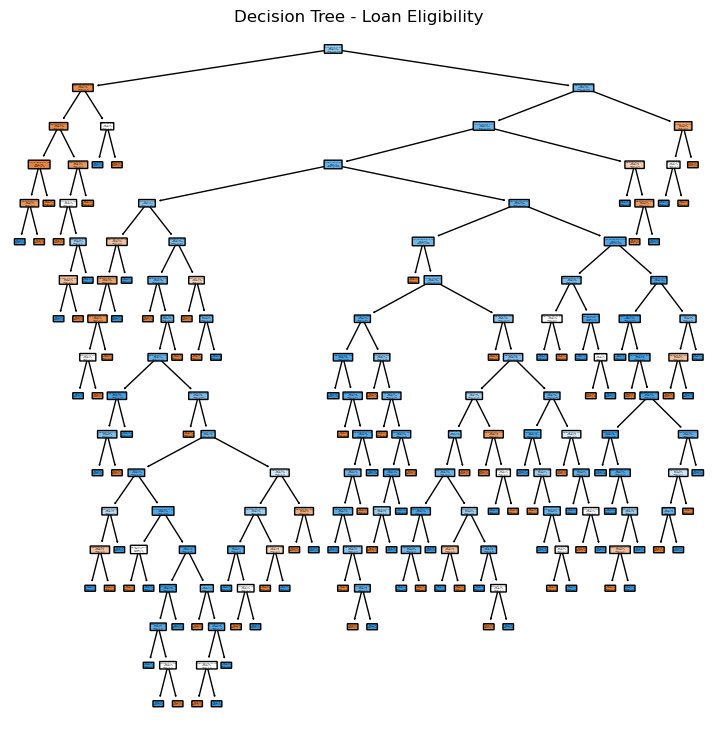

In [65]:
plt.figure(figsize=(9,9))
tree.plot_tree(dt_classifier, filled=True, feature_names=X.columns, class_names=['N', 'Y'], rounded=True, proportion=False, precision=2)
plt.title("Decision Tree - Loan Eligibility")
plt.show()